In [32]:
from pylab import plot, axis, show, pcolor, colorbar, bone
from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
import time

In [33]:
#Settig HyperParameters
som_grid_rows = 30
som_grid_columns = 20
iterations = 500
sigma = 1
learning_rate = 0.5

In [34]:
#Load Data
data, target = load_breast_cancer(True)

In [35]:
#initilization
som = MiniSom(x=som_grid_rows,
              y=som_grid_columns,
              input_len=data.shape[1],
              sigma=sigma,
              learning_rate=learning_rate)
#som.random_weight_init(data)

In [36]:
#training
start_time = time.time()
som.train_random(data, iterations)  # We will train with 100 iterations
elapsed_time = time.time() - start_time
print(elapsed_time, "Seconds")

0.11583065986633301 Seconds


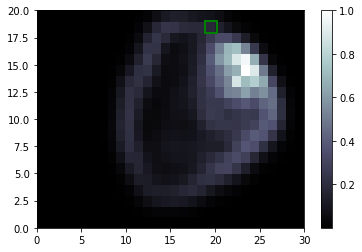

In [37]:
bone()
pcolor(som.distance_map().T)  # Distance map as a background
colorbar()

#We are usind different colors and markers for each lables
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']

for cnt, xx in enumerate(data):
    w = som.winner(xx)  # Getting winner

#We place a marker on the winning positions for sample XX
plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
     markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)
axis([0, som._weights.shape[0], 0, som._weights.shape[1]])
show()